In [1]:
import pandas as pd
import numpy as np

In [40]:
data = pd.read_csv('Pokemon.csv')
data.drop('#', inplace=True, axis=1)

In [41]:

data.fillna(value='No Type', inplace=True,axis=1)
data.rename({'Type 1':'type1', 'Type 2': 'type2'}, inplace=True,axis=1)
data.head()

,Name,type1,type2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,Charmander,Fire,No Type,309,39,52,43,60,50,65,1,False


In [25]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 12 columns):
Name          800 non-null object
type1         800 non-null object
type2         800 non-null object
Total         800 non-null int64
HP            800 non-null int64
Attack        800 non-null int64
Defense       800 non-null int64
Sp. Atk       800 non-null int64
Sp. Def       800 non-null int64
Speed         800 non-null int64
Generation    800 non-null int64
Legendary     800 non-null bool
dtypes: bool(1), int64(8), object(3)
memory usage: 69.6+ KB


In [26]:
data.describe()

,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation
count,800.00000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.00000
mean,435.10250,69.258750,79.001250,73.842500,72.820000,71.902500,68.277500,3.32375
std,119.96304,25.534669,32.457366,31.183501,32.722294,27.828916,29.060474,1.66129
min,180.00000,1.000000,5.000000,5.000000,10.000000,20.000000,5.000000,1.00000
25%,330.00000,50.000000,55.000000,50.000000,49.750000,50.000000,45.000000,2.00000
50%,450.00000,65.000000,75.000000,70.000000,65.000000,70.000000,65.000000,3.00000
75%,515.00000,80.000000,100.000000,90.000000,95.000000,90.000000,90.000000,5.00000
max,780.00000,255.000000,190.000000,230.000000,194.000000,230.000000,180.000000,6.00000


In [27]:
data.describe(include=np.object)

,Name,type1,type2
count,800,800,800
unique,800,18,19
top,Greninja,Water,No Type
freq,1,112,386


In [29]:
from sklearn.preprocessing import LabelEncoder, MinMaxScaler

In [42]:
minmax= MinMaxScaler()
encoder = LabelEncoder()


In [44]:
data['scaled_total'] = minmax.fit_transform(data[['Total']])
data['encoded_type1'] = encoder.fit_transform(data['type1'])

In [45]:
data.head()

,Name,type1,type2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,scaled_total,encoded_type1
0,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False,0.230000,9
1,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False,0.375000,9
2,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False,0.575000,9
3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False,0.741667,9
4,Charmander,Fire,No Type,309,39,52,43,60,50,65,1,False,0.215000,6


In [62]:
embed_size = min(data.encoded_type1.nunique()/2,50)
embed_size

9.0

In [63]:
from tensorflow.keras.layers import Embedding, Dense, Flatten
from tensorflow.keras import Sequential

In [100]:
model = Sequential()
model.add(Embedding(input_dim=18,output_dim=3, input_length=1, name="poke_embedding"))
model.add(Flatten( name="flatten"))
model.add(Dense(30, activation="relu", name= 'relu1'))
model.add(Dense(15, activation="relu", name='relu2'))
model.add(Dense(1, activation="linear"))
model.compile(optimizer="adam", loss="mse")
model.fit(x=data.encoded_type1.values, y=data.scaled_total.values, epochs=30)

Train on 800 samples
Epoch 1/30
800/800 [==============================] - 1s 925us/sample - loss: 0.1647
Epoch 2/30
800/800 [==============================] - 0s 55us/sample - loss: 0.0657
Epoch 3/30
800/800 [==============================] - 0s 57us/sample - loss: 0.0416
Epoch 4/30
800/800 [==============================] - 0s 54us/sample - loss: 0.0396
Epoch 5/30
800/800 [==============================] - 0s 56us/sample - loss: 0.0391
Epoch 6/30
800/800 [==============================] - 0s 55us/sample - loss: 0.0386
Epoch 7/30
800/800 [==============================] - ETA: 0s - loss: 0.046 - 0s 61us/sample - loss: 0.0383
Epoch 8/30
800/800 [==============================] - 0s 55us/sample - loss: 0.0375
Epoch 9/30
800/800 [==============================] - 0s 55us/sample - loss: 0.0370
Epoch 10/30
800/800 [==============================] - 0s 57us/sample - loss: 0.0367
Epoch 11/30
800/800 [==============================] - 0s 57us/sample - loss: 0.0366
Epoch 12/30
800/800 [=======

In [103]:
embedding_layer = model.get_layer(name="poke_embedding")
embedding_layer = pd.DataFrame(embedding_layer.get_weights()[0])
embedding_layer.columns = ['C1','C2','C3']

In [104]:
embedding_layer

,C1,C2,C3
0,-0.012979,0.032232,-0.083212
1,0.001051,-0.075127,-0.013346
2,0.012443,-0.172539,0.172433
3,0.005665,-0.063259,0.006186
4,-0.008496,0.018462,0.028153
5,0.012856,0.016874,0.041361
6,0.069879,-0.097838,0.019923
7,-0.011384,-0.090241,0.076133
8,0.046162,-0.042525,0.037931
9,0.071656,-0.020042,0.001442


In [74]:
n_types = 18

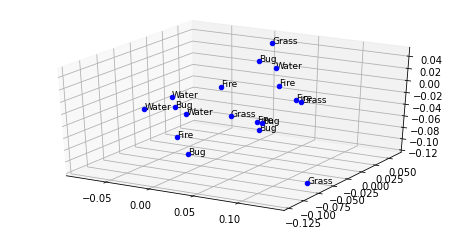

In [77]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d, Axes3D
types_names = list(encoder.inverse_transform([x for x in range(0,n_types)]))
xs = embedding_layer['C1']
ys = embedding_layer['C2']
zs = embedding_layer['C3']
fig = plt.figure(figsize=(8, 4))
ax = fig.add_subplot(111, projection='3d')
for index, embedding in embedding_layer.iterrows():
    x = embedding['C1']
    y = embedding['C2']
    z = embedding['C3']
    ax.scatter(x, y, z, color='b')
    ax.text(x, y, z, '%s' % (data.type1[index]), size=9, zorder=1, color='k')
plt.draw()

In [81]:
embedding_layer = model.get_layer(name="poke_embedding")


In [85]:
(embedding_layer.get_weights())

[array([[ 0.00932284,  0.05470883,  0.04317559],
        [-0.00796323,  0.01096069, -0.06694961],
        [ 0.13502033, -0.07044952, -0.11251508],
        [ 0.06599495,  0.02194072, -0.03220545],
        [-0.03636497,  0.03551605, -0.03144143],
        [ 0.01499056,  0.06002766, -0.02995072],
        [ 0.03570941, -0.00773304, -0.05932505],
        [ 0.02420709, -0.11897464, -0.03671456],
        [ 0.05909096,  0.02311078, -0.03030739],
        [-0.06866603, -0.00129101, -0.041135  ],
        [-0.05548326,  0.00417273, -0.06992841],
        [-0.08109494, -0.02855594, -0.05257696],
        [ 0.0290753 ,  0.03250295,  0.0141484 ],
        [ 0.01953045,  0.01807903,  0.02954167],
        [ 0.06637806, -0.04877223, -0.0484765 ],
        [ 0.02266467,  0.01965673, -0.07569002],
        [ 0.01446258, -0.08964985, -0.08069043],
        [-0.06602968,  0.00035575, -0.05882932]], dtype=float32)]

In [ ]:
'''
embedding for type2
1.get number of uniques
2.encode to string
3.give to nn
'''


In [105]:
data['type2_encoded'] = encoder.fit_transform(data['type2'])

In [108]:
data['type2_encoded'].nunique()

19

In [120]:
model2 = Sequential()
model2.add(Embedding(input_dim=19,output_dim=9, input_length=1, name="poke_embedding"))
model2.add(Flatten( name="flatten"))
model2.add(Dense(30, activation="relu", name= 'relu1'))
model2.add(Dense(15, activation="relu", name='relu2'))
model2.add(Dense(1, activation="linear"))
model2.compile(optimizer="adam", loss="mse")
model2.fit(x=data.type2_encoded.values, y=data.scaled_total.values, epochs=30)

Train on 800 samples
Epoch 1/30
800/800 [==============================] - 1s 935us/sample - loss: 0.1268
Epoch 2/30
800/800 [==============================] - 0s 61us/sample - loss: 0.0443
Epoch 3/30
800/800 [==============================] - 0s 57us/sample - loss: 0.0382
Epoch 4/30
800/800 [==============================] - 0s 55us/sample - loss: 0.0375
Epoch 5/30
800/800 [==============================] - 0s 61us/sample - loss: 0.0368
Epoch 6/30
800/800 [==============================] - 0s 56us/sample - loss: 0.0367
Epoch 7/30
800/800 [==============================] - 0s 58us/sample - loss: 0.0368
Epoch 8/30
800/800 [==============================] - 0s 55us/sample - loss: 0.0369
Epoch 9/30
800/800 [==============================] - 0s 56us/sample - loss: 0.0368
Epoch 10/30
800/800 [==============================] - 0s 56us/sample - loss: 0.0366
Epoch 11/30
800/800 [==============================] - 0s 55us/sample - loss: 0.0366
Epoch 12/30
800/800 [==============================]

In [121]:
type2_layer = model2.get_layer('poke_embedding')

In [122]:
type2_weights = type2_layer.get_weights()[0]

In [123]:
type2_weights

array([[-0.00692519,  0.01772921,  0.02501306,  0.0666337 ,  0.01294543,
         0.01291339,  0.0062882 ,  0.03742748, -0.0336509 ],
       [-0.02313148, -0.01292823, -0.05540051, -0.07838739,  0.00858443,
         0.02390943, -0.06335111, -0.07799479, -0.06506366],
       [-0.09593192,  0.05060536, -0.04541459, -0.0264559 ,  0.04309379,
        -0.07265579, -0.02143644,  0.04008137, -0.00892469],
       [-0.02239782, -0.01638495, -0.03747686,  0.02817255,  0.05418132,
        -0.01932417,  0.02029349,  0.01938607,  0.04663241],
       [ 0.03162454, -0.01120688,  0.0161062 , -0.00892095, -0.00237051,
        -0.01113857,  0.01258505, -0.02947221, -0.04287748],
       [-0.08556286,  0.06354355, -0.01288206, -0.06389853,  0.02737439,
        -0.01673687, -0.03385142, -0.04532826,  0.05779352],
       [-0.03186458,  0.00737083, -0.02893493, -0.07486366,  0.10602754,
         0.03029477, -0.10488575,  0.08195194,  0.08180234],
       [-0.0289206 , -0.05293551,  0.02645229, -0.02846273,  0

In [124]:
type2_em_df = pd.DataFrame(type2_weights)
type2_em_df

,0,1,2,3,4,5,6,7,8
0,-0.006925,0.017729,0.025013,0.066634,0.012945,0.012913,0.006288,0.037427,-0.033651
1,-0.023131,-0.012928,-0.055401,-0.078387,0.008584,0.023909,-0.063351,-0.077995,-0.065064
2,-0.095932,0.050605,-0.045415,-0.026456,0.043094,-0.072656,-0.021436,0.040081,-0.008925
3,-0.022398,-0.016385,-0.037477,0.028173,0.054181,-0.019324,0.020293,0.019386,0.046632
4,0.031625,-0.011207,0.016106,-0.008921,-0.002371,-0.011139,0.012585,-0.029472,-0.042877
5,-0.085563,0.063544,-0.012882,-0.063899,0.027374,-0.016737,-0.033851,-0.045328,0.057794
6,-0.031865,0.007371,-0.028935,-0.074864,0.106028,0.030295,-0.104886,0.081952,0.081802
7,-0.028921,-0.052936,0.026452,-0.028463,0.055693,-0.036585,0.014840,-0.059150,-0.034221
8,-0.009903,-0.020906,-0.037357,0.068613,-0.005608,0.047811,0.021963,0.035321,0.062772
9,0.017829,-0.045144,0.013226,-0.025615,-0.042207,-0.003358,-0.004649,-0.025910,0.013995
